## Predicting deaths in 2022 due Covid19 

### The project's main target is to predict the deaths in 2022 by country before the vaccination and expect our life during the pandemic without the vaccine then compare it with the real world cases in 2022 after vaccination.


In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

In [2]:
df = pd.read_csv('To_model2.csv')
df.head()

,Country,Total_Cases2020,Total_Cases2021,Total_deaths_2020,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults),Total_deaths_2021
0,United States,20217056,54904270,350555,331501080,0.0610,10.00,369500000,35.61,38.3,0.15,0.10,2.77,0.93,0.230,475059
1,Brazil,7681032,22291839,195072,213196304,0.0360,25.93,45410000,25.04,33.5,0.09,0.05,2.20,0.77,0.128,424262
2,India,10286709,34861579,148994,1396387127,0.0074,24.80,68960000,450.42,28.2,0.06,0.03,0.53,0.65,0.270,332492
3,Russia,3127347,10320405,56271,144073139,0.0217,-1.72,62450000,8.82,39.6,0.14,0.09,8.05,0.82,0.268,246400
4,Mexico,1426094,3979723,125807,125998302,0.0113,22.08,34130000,66.44,29.3,0.07,0.04,1.38,0.78,0.131,173621


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         115 non-null    object 
 1   Total_Cases2020                 115 non-null    int64  
 2   Total_Cases2021                 115 non-null    int64  
 3   Total_deaths_2020               115 non-null    int64  
 4   Population                      115 non-null    int64  
 5   %Infection_of_Total_Population  115 non-null    float64
 6   Averager_yearly_temperature     115 non-null    float64
 7   Airline_Passengers              115 non-null    int64  
 8   population_density              115 non-null    float64
 9   median_age                      115 non-null    float64
 10  aged_65_older%                  115 non-null    float64
 11  aged_70_older%                  115 non-null    float64
 12  hospital_beds_per_thousand      115 

## Exploratory Data Analysis
### Questions to answer: 
### 1- What are the top countries in total deaths in 2021?
### 2- What are the top countries in infection rate?
### 3- What is the relation between infection rate and total deaths 2021?
### 4- What are the top countries Total Cases 2021?
### 5-What is the relation between total cases 2021 and total deaths 2021?
### 6-What is the relation between Population and total deaths 2021?
### 7-What are the top countries in Airline Passengers?
### 8-What is the relation between Airline Passengers and total deaths 2021?
### 9- What are the top countries in hospital_beds_per_thousand?
### 10-What is the relation between hospital_beds_per_thousand and total deaths 2021?
### 11-What is the top countries in Averager_yearly_temperature?
### 12-What is the relation between Averager_yearly_temperature and Total Deaths 2021?
### 13-What is the top countries in aged_65_older%?
### 14-What is the relation between aged_65_older% and Total Deaths 2021?
### 15-What is the top countries in human_development_index%?
### 16-What is the relation between human_development_index and Total Deaths 2021?

In [4]:
df.describe()

,Total_Cases2020,Total_Cases2021,Total_deaths_2020,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults),Total_deaths_2021
count,1.150000e+02,1.150000e+02,115.000000,1.150000e+02,115.000000,115.000000,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,6.880559e+05,2.333632e+06,15999.417391,5.952326e+07,0.019562,18.135391,1.488000e+07,224.900609,32.515652,0.098696,0.063478,2.996783,0.765043,0.189504,29360.408696
std,2.242842e+06,6.537966e+06,43509.895891,1.878776e+08,0.019251,8.116743,5.250516e+07,770.357411,8.626627,0.065541,0.045249,2.371809,0.137473,0.098738,72809.965067
min,4.900000e+01,2.660000e+03,0.000000,9.846200e+04,0.000000,-4.270000,0.000000e+00,1.980000,16.400000,0.010000,0.010000,0.200000,0.450000,0.000000,3.000000
25%,3.182050e+04,1.939915e+05,343.500000,5.251290e+06,0.001900,11.105000,3.250000e+05,36.990000,25.950000,0.040000,0.030000,1.300000,0.685000,0.117500,1449.000000
50%,1.391400e+05,5.705560e+05,2189.000000,1.566967e+07,0.013400,20.410000,1.460000e+06,85.130000,32.200000,0.070000,0.050000,2.320000,0.780000,0.208000,5167.000000
75%,4.382860e+05,1.658398e+06,8946.000000,4.379186e+07,0.032950,25.325000,1.091000e+07,152.750000,40.200000,0.150000,0.100000,4.100000,0.880000,0.254500,19202.000000
max,2.021706e+07,5.490427e+07,350555.000000,1.411100e+09,0.073600,29.630000,4.172600e+08,7915.730000,48.200000,0.270000,0.180000,13.050000,0.960000,0.390000,475059.000000


### What are the top countries in total deaths in 2021?

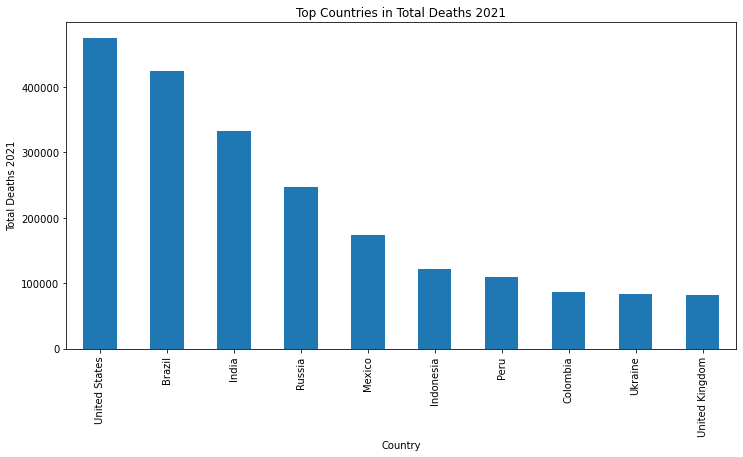

In [5]:
deaths_country = df.groupby(['Country'])['Total_deaths_2021'].sum().sort_values(ascending= False)[0:10]
deaths_country.plot(kind = 'bar', title = 'Top Countries in Total Deaths 2021',figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Total Deaths 2021');

### What are the top countries in infection rate?

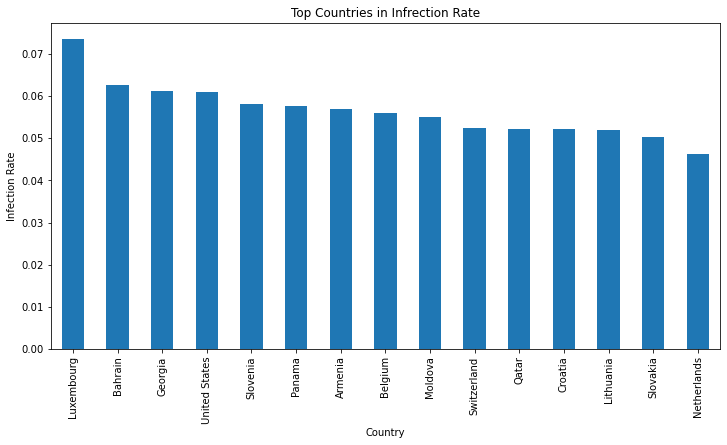

In [6]:
deaths_country = df.groupby(['Country'])['%Infection_of_Total_Population'].sum().sort_values(ascending= False)[0:15]
deaths_country.plot(kind = 'bar' , title = 'Top Countries in Infrection Rate',figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Infection Rate');

## Distributions of numeric features

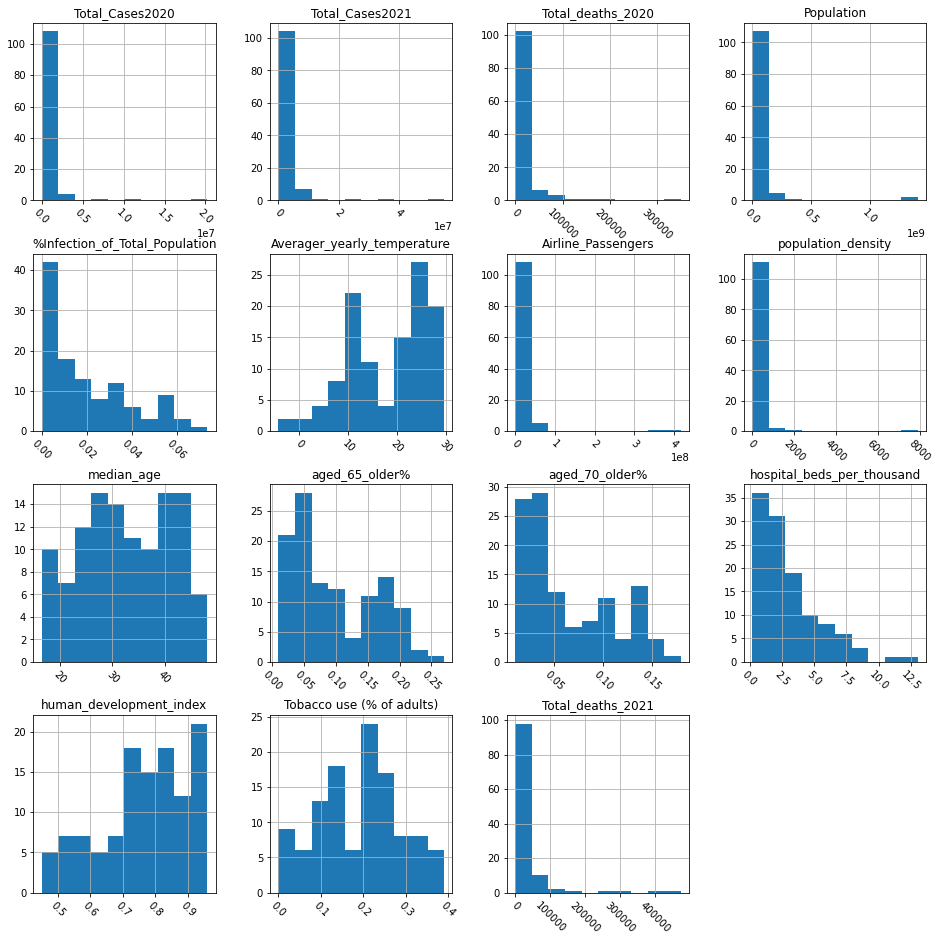

In [7]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

### What about the outliers in total deaths?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_deaths_2021'>

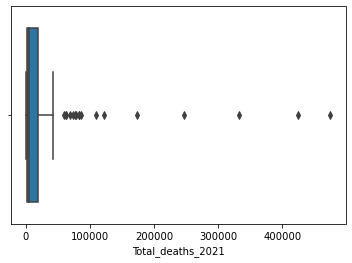

In [8]:
sns.boxplot(df.Total_deaths_2021)

### Answer

In [9]:
df.groupby(['Country'])['Total_deaths_2021'].sum().sort_values(ascending= False)[0:10]

Country
United States     475059
Brazil            424262
India             332492
Russia            246400
Mexico            173621
Indonesia         121956
Peru              109620
Colombia           86729
Ukraine            82807
United Kingdom     82399
Name: Total_deaths_2021, dtype: int64

### What about the outliers in infection rate?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='%Infection_of_Total_Population'>

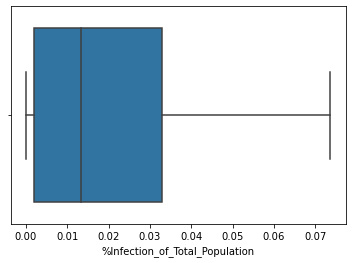

In [10]:
sns.boxplot(df['%Infection_of_Total_Population'])

### Answer: There are no outliers but the data is left sckewed.

In [11]:
df.groupby(['Country'])['%Infection_of_Total_Population'].sum().sort_values(ascending= False)[0:10]

Country
Luxembourg       0.0736
Bahrain          0.0627
Georgia          0.0611
United States    0.0610
Slovenia         0.0581
Panama           0.0575
Armenia          0.0568
Belgium          0.0560
Moldova          0.0550
Switzerland      0.0524
Name: %Infection_of_Total_Population, dtype: float64

In [12]:
df.groupby(['Country'])['%Infection_of_Total_Population'].sum().sort_values(ascending= True)[0:10]

Country
Vietnam         0.0000
Cambodia        0.0000
Tanzania        0.0000
Fiji            0.0001
Thailand        0.0001
China           0.0001
Malawi          0.0003
Burkina Faso    0.0003
Togo            0.0004
Mongolia        0.0004
Name: %Infection_of_Total_Population, dtype: float64

### What is the relation between infection rate and total deaths?

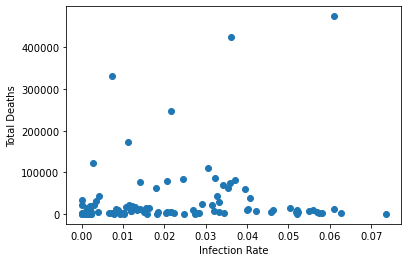

In [13]:
plt.scatter(df['%Infection_of_Total_Population'], df['Total_deaths_2021'])
plt.xlabel('Infection Rate')
plt.ylabel('Total Deaths')
plt.show()

### What are the top countries in Total Cases 2021? Are there outliers?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Cases2021'>

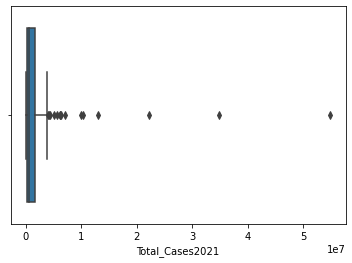

In [14]:
sns.boxplot(df.Total_Cases2021)

### Answer

In [15]:
df.groupby(['Country'])['Total_Cases2021'].sum().sort_values(ascending= False)[0:10]

Country
United States     54904270
India             34861579
Brazil            22291839
United Kingdom    12937886
Russia            10320405
France            10018021
Germany            7109182
Spain              6294745
Iran               6194401
Italy              6125683
Name: Total_Cases2021, dtype: int64

### What is the relation between total cases 2021 and total deaths 2021

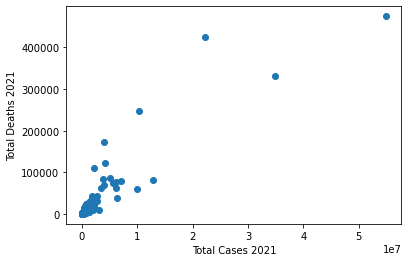

In [16]:
plt.scatter(df['Total_Cases2021'], df['Total_deaths_2021'])
plt.xlabel('Total Cases 2021')
plt.ylabel('Total Deaths 2021')
plt.show()

### What are the top countries in Population? 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

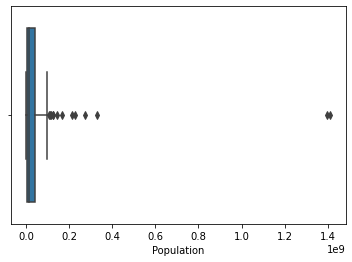

In [17]:
sns.boxplot(df.Population)

### Answer 

In [18]:
df.groupby(['Country'])['Population'].sum().sort_values(ascending= False)[0:10]

Country
China            1411100000
India            1396387127
United States     331501080
Indonesia         271857970
Pakistan          227196741
Brazil            213196304
Bangladesh        167420951
Russia            144073139
Japan             126261000
Mexico            125998302
Name: Population, dtype: int64

### What is the relation between Population and total deaths 2021

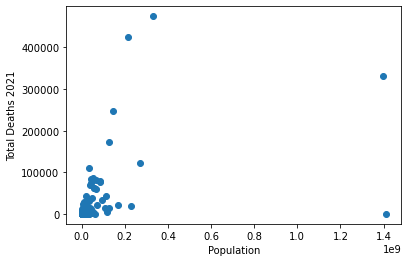

In [19]:
plt.scatter(df['Population'], df['Total_deaths_2021'])
plt.xlabel('Population')
plt.ylabel('Total Deaths 2021')
plt.show()

###  What are the top countries in Airline Passengers?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline_Passengers'>

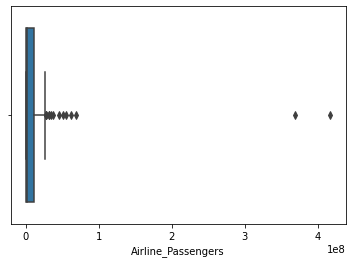

In [20]:
sns.boxplot(df.Airline_Passengers)

### Answer

In [21]:
df.groupby(['Country'])['Airline_Passengers'].sum().sort_values(ascending= False)[0:10]

Country
China            417260000
United States    369500000
India             68960000
Russia            62450000
Ireland           54580000
Japan             51130000
Brazil            45410000
Indonesia         37520000
Mexico            34130000
Vietnam           31770000
Name: Airline_Passengers, dtype: int64

### What is the relation between Airline Passengers and total deaths 2021

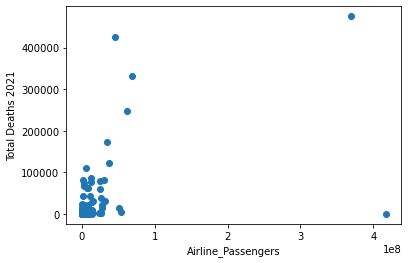

In [22]:
plt.scatter(df['Airline_Passengers'], df['Total_deaths_2021'])
plt.xlabel('Airline_Passengers')
plt.ylabel('Total Deaths 2021')
plt.show()

### What are the outliers for hospital_beds_per_thousand?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_beds_per_thousand'>

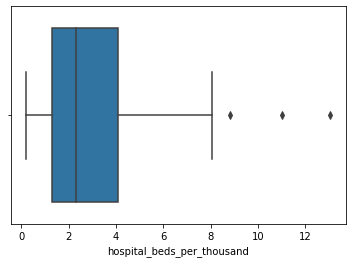

In [23]:
sns.boxplot(df.hospital_beds_per_thousand)

### Answer

In [24]:
df.groupby(['Country'])['hospital_beds_per_thousand'].sum().sort_values(ascending= False)[0:10]

Country
Japan       13.05
Belarus     11.00
Ukraine      8.80
Russia       8.05
Germany      8.00
Bulgaria     7.45
Austria      7.37
Hungary      7.02
Mongolia     7.00
Romania      6.89
Name: hospital_beds_per_thousand, dtype: float64

### What is the relation between hospital_beds_per_thousand and Total_deaths_2021?

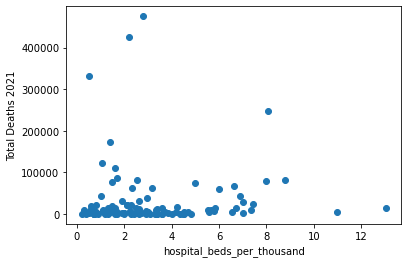

In [25]:
plt.scatter(df['hospital_beds_per_thousand'], df['Total_deaths_2021'])
plt.xlabel('hospital_beds_per_thousand')
plt.ylabel('Total Deaths 2021')
plt.show()

### What is the top countries in Averager_yearly_temperature? Are There outliers?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Averager_yearly_temperature'>

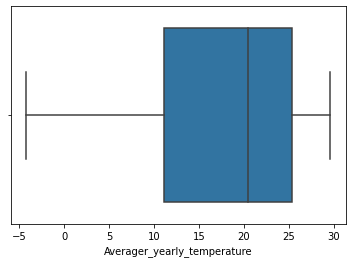

In [26]:
sns.boxplot(df.Averager_yearly_temperature)

### Answer: There are no outliers but the data is right skewed

### What is the relation between Averager_yearly_temperature and Total Deaths 2021?

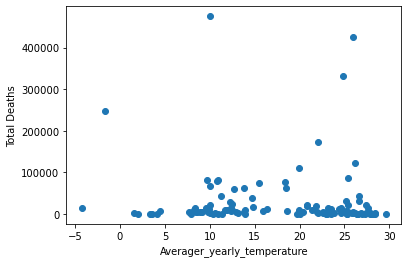

In [27]:
plt.scatter(df['Averager_yearly_temperature'], df['Total_deaths_2021'])
plt.xlabel('Averager_yearly_temperature')
plt.ylabel('Total Deaths')
plt.show()

### What is the top countries in aged_65_older%? Are There outliers?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aged_65_older%'>

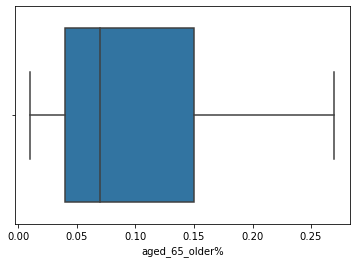

In [28]:
sns.boxplot(df['aged_65_older%'])

### Answer: There are no outliers but the data is left skewed

In [29]:
df.groupby(['Country'])['aged_65_older%'].sum().sort_values(ascending= False)[0:10]

Country
Japan       0.27
Italy       0.23
Portugal    0.22
Bulgaria    0.21
Germany     0.21
Finland     0.21
Greece      0.20
France      0.20
Denmark     0.20
Croatia     0.20
Name: aged_65_older%, dtype: float64

### What is the relation between aged_65_older% and Total Deaths 2021?

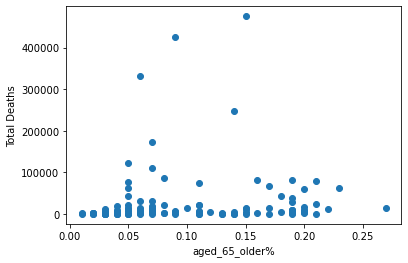

In [30]:
plt.scatter(df['aged_65_older%'], df['Total_deaths_2021'])
plt.xlabel('aged_65_older%')
plt.ylabel('Total Deaths')
plt.show()

### What is the top countries in human_development_index%? Are There outliers?

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='human_development_index'>

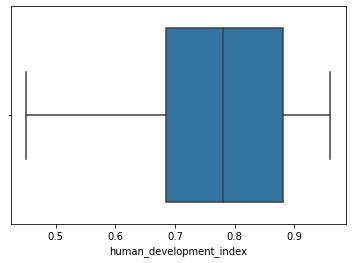

In [31]:
sns.boxplot(df['human_development_index'])

### Answer: There are no outliers but the data is right skewed

In [32]:
df.groupby(['Country'])['human_development_index'].sum().sort_values(ascending= False)[0:10]

Country
Ireland        0.96
Norway         0.96
Switzerland    0.96
Iceland        0.95
Germany        0.95
Sweden         0.95
Singapore      0.94
Australia      0.94
Finland        0.94
Netherlands    0.94
Name: human_development_index, dtype: float64

### What is the relation between human_development_index and Total Deaths 2021?

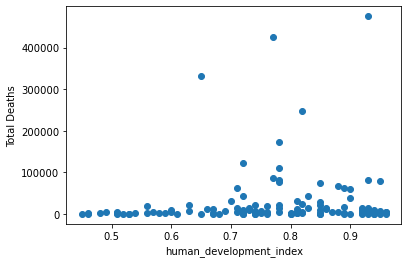

In [33]:
plt.scatter(df['human_development_index'], df['Total_deaths_2021'])
plt.xlabel('human_development_index')
plt.ylabel('Total Deaths')
plt.show()

In [34]:
corr_matrix = df.corr()
corr_matrix

,Total_Cases2020,Total_Cases2021,Total_deaths_2020,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults),Total_deaths_2021
Total_Cases2020,1.000000,0.989052,0.939482,0.429960,0.241382,-0.093102,0.603128,-0.029852,0.121912,0.122395,0.115775,0.007701,0.139474,0.097584,0.896231
Total_Cases2021,0.989052,1.000000,0.933427,0.469862,0.224847,-0.096500,0.577975,-0.028505,0.141840,0.141278,0.134582,0.019697,0.152931,0.122904,0.906475
Total_deaths_2020,0.939482,0.933427,1.000000,0.364550,0.252309,-0.087244,0.551962,-0.049592,0.134884,0.136220,0.127941,-0.010629,0.164009,0.056227,0.928382
Population,0.429960,0.469862,0.364550,1.000000,-0.132619,-0.010982,0.685080,0.001859,-0.004501,-0.039682,-0.064032,-0.049421,-0.081750,0.127654,0.437151
%Infection_of_Total_Population,0.241382,0.224847,0.252309,-0.132619,1.000000,-0.347186,0.057405,0.008891,0.557600,0.477332,0.493149,0.325923,0.588644,0.313421,0.175748
Averager_yearly_temperature,-0.093102,-0.096500,-0.087244,-0.010982,-0.347186,1.000000,-0.181404,0.169046,-0.580764,-0.648722,-0.653905,-0.609560,-0.520181,-0.418850,-0.061437
Airline_Passengers,0.603128,0.577975,0.551962,0.685080,0.057405,-0.181404,1.000000,-0.022655,0.167139,0.121833,0.104258,0.076757,0.148382,0.101924,0.483714
population_density,-0.029852,-0.028505,-0.049592,0.001859,0.008891,0.169046,-0.022655,1.000000,0.129179,0.046957,0.009295,-0.029413,0.134569,0.028370,-0.050403
median_age,0.121912,0.141840,0.134884,-0.004501,0.557600,-0.580764,0.167139,0.129179,1.000000,0.902705,0.897921,0.680961,0.883538,0.501273,0.109852
aged_65_older%,0.122395,0.141278,0.136220,-0.039682,0.477332,-0.648722,0.121833,0.046957,0.902705,1.000000,0.989461,0.667097,0.752324,0.498962,0.088093


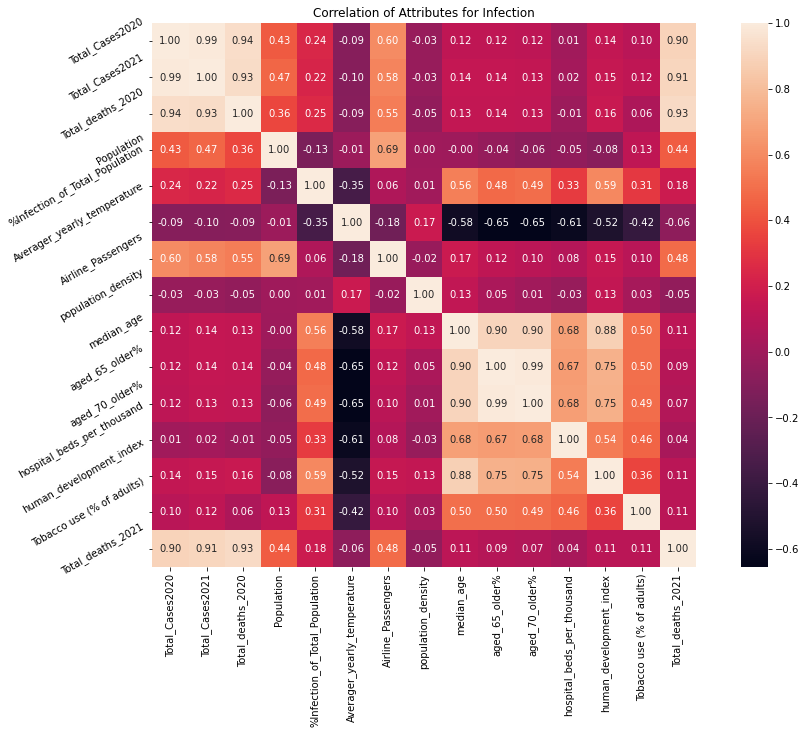

In [35]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes for Infection')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

## Data preprocessing

In [36]:
df_model = df.copy()
df_model = df_model.drop(['Country'], axis = 1)
df_model.head()

,Total_Cases2020,Total_Cases2021,Total_deaths_2020,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults),Total_deaths_2021
0,20217056,54904270,350555,331501080,0.0610,10.00,369500000,35.61,38.3,0.15,0.10,2.77,0.93,0.230,475059
1,7681032,22291839,195072,213196304,0.0360,25.93,45410000,25.04,33.5,0.09,0.05,2.20,0.77,0.128,424262
2,10286709,34861579,148994,1396387127,0.0074,24.80,68960000,450.42,28.2,0.06,0.03,0.53,0.65,0.270,332492
3,3127347,10320405,56271,144073139,0.0217,-1.72,62450000,8.82,39.6,0.14,0.09,8.05,0.82,0.268,246400
4,1426094,3979723,125807,125998302,0.0113,22.08,34130000,66.44,29.3,0.07,0.04,1.38,0.78,0.131,173621


In [37]:
encoded = list(df.columns)
print (encoded)

['Country', 'Total_Cases2020', 'Total_Cases2021', 'Total_deaths_2020', 'Population', '%Infection_of_Total_Population', 'Averager_yearly_temperature', 'Airline_Passengers', 'population_density', 'median_age', 'aged_65_older%', 'aged_70_older%', 'hospital_beds_per_thousand', 'human_development_index', 'Tobacco use (% of adults)', 'Total_deaths_2021']


In [38]:
features_raw = df_model.drop(['Total_deaths_2021','Total_Cases2021'], axis = 1)
deaths_2021 = df_model['Total_deaths_2021']
features_raw.head()

,Total_Cases2020,Total_deaths_2020,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults)
0,20217056,350555,331501080,0.0610,10.00,369500000,35.61,38.3,0.15,0.10,2.77,0.93,0.230
1,7681032,195072,213196304,0.0360,25.93,45410000,25.04,33.5,0.09,0.05,2.20,0.77,0.128
2,10286709,148994,1396387127,0.0074,24.80,68960000,450.42,28.2,0.06,0.03,0.53,0.65,0.270
3,3127347,56271,144073139,0.0217,-1.72,62450000,8.82,39.6,0.14,0.09,8.05,0.82,0.268
4,1426094,125807,125998302,0.0113,22.08,34130000,66.44,29.3,0.07,0.04,1.38,0.78,0.131


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_raw,deaths_2021,test_size = 0.3,random_state = 0)

### Feature Scaling

In [40]:
# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)


## Machine Learning Models

### Model-1: Linear Regression model

In [41]:
from sklearn.linear_model import LinearRegression



# instantiate an object lr
lr = LinearRegression()
# Train the model using the training sets
lr.fit(X_train, y_train)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 80 samples.
Testing set has 35 samples.


In [42]:
y_pred = lr.predict(X_test)

In [43]:
print("Train Results for Linear Regression:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred))
print("Mean squared error: ", mse(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Linear Regression:
*******************************
R-squared:  0.5835600232316437
Mean squared error:  2041593739.7094233
Mean Absolute Error:  20696.813804141177


### Model-2 Ridge Regression


In [44]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# import the model
from sklearn.linear_model import Ridge

tuned_params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_ridge = GridSearchCV(Ridge(), tuned_params_ridge, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [45]:
model_ridge.best_estimator_

Ridge(alpha=10)

In [46]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred_ridge))
print("Mean squared error: ", mse(y_test, y_pred_ridge))
print("Mean Absolute Error: ", mae(y_test, y_pred_ridge))

Train Results for Ridge Regression:
*******************************
R-squared:  0.7805123667192013
Mean squared error:  1076036411.1223965
Mean Absolute Error:  15503.085232832984


### Model-3 Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor(max_depth=8, random_state=0)
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [48]:
print("Train Results for Decision Tree:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred_tree))
print("Mean squared error: ", mse(y_test, y_pred_tree))
print("Mean Absolute Error: ", mae(y_test, y_pred_tree))

Train Results for Decision Tree:
*******************************
R-squared:  0.805905569740162
Mean squared error:  951546431.2672659
Mean Absolute Error:  15227.43537414966


In [49]:
indices_tree = np.argsort(-tree.feature_importances_)
print("The features in order of importance for decision tree are:")
print(50*'-')
for feature in features_raw.columns[indices_tree]:
    print(feature)

The features in order of importance for decision tree are:
--------------------------------------------------
Total_Cases2020
Airline_Passengers
Total_deaths_2020
%Infection_of_Total_Population
Tobacco use (% of adults)
Population
human_development_index
population_density
hospital_beds_per_thousand
aged_70_older%
aged_65_older%
Averager_yearly_temperature
median_age


### Model-4 Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor


tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, random_state =0, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred_random_forest = forest.predict(X_test)

In [51]:
print("Train Results for Random Forest:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred_random_forest))
print("Mean squared error: ", mse(y_test, y_pred_random_forest))
print("Mean Absolute Error: ", mae(y_test, y_pred_random_forest))

Train Results for Random Forest:
*******************************
R-squared:  0.788007637901235
Mean squared error:  1039290902.582576
Mean Absolute Error:  13884.955272529412


### Model-5 XGBoost Regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
xgb_model = RandomizedSearchCV(xgb.XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [53]:
print("Train Results for Random Forest:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred_xgb))
print("Mean squared error: ", mse(y_test, y_pred_xgb))
print("Mean Absolute Error: ", mae(y_test, y_pred_xgb))

Train Results for Random Forest:
*******************************
R-squared:  0.7269661463338306
Mean squared error:  1338546339.137023
Mean Absolute Error:  14783.750653948102


### Model-5 Adaboost Regression

In [54]:
from sklearn.ensemble import AdaBoostRegressor
ada_mod = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=30, random_state=0)
ada_mod.fit(X_train,y_train)
y_pred_adaboost = ada_mod.predict(X_test)

In [55]:
print("Train Results for adaboost:")
print("*******************************")
print("R-squared: ", rs(y_test, y_pred_adaboost))
print("Mean squared error: ", mse(y_test, y_pred_adaboost))
print("Mean Absolute Error: ", mae(y_test, y_pred_adaboost))

Train Results for adaboost:
*******************************
R-squared:  0.6186271428207578
Mean squared error:  1869677459.2928572
Mean Absolute Error:  16953.5


## The best model to predict the deaths is Decision Tree regreesor with r2 score: 0.8

## Predict the deaths for 2022 based on the selected model 

In [56]:
df_to_predict = pd.read_csv('To Predict2.csv')
df_to_predict.head()

,Country,Total_Cases2021,Total_deaths_2021,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults)
0,United States,45876564,475059,331501080,0.0610,10.00,369500000,35.61,38.3,0.15,0.10,2.77,0.93,0.230
1,Brazil,14039442,424262,213196304,0.0360,25.93,45410000,25.04,33.5,0.09,0.05,2.20,0.77,0.128
2,India,9818294,332492,1396387127,0.0074,24.80,68960000,450.42,28.2,0.06,0.03,0.53,0.65,0.270
3,Russia,11170110,246400,144073139,0.0217,-1.72,62450000,8.82,39.6,0.14,0.09,8.05,0.82,0.268
4,Mexico,3254744,173621,125998302,0.0113,22.08,34130000,66.44,29.3,0.07,0.04,1.38,0.78,0.131


In [57]:
df_to_predict_model = df_to_predict.copy()
df_to_predict_model = df_to_predict.drop(['Country'], axis = 1)
df_to_predict_model.head()

,Total_Cases2021,Total_deaths_2021,Population,%Infection_of_Total_Population,Averager_yearly_temperature,Airline_Passengers,population_density,median_age,aged_65_older%,aged_70_older%,hospital_beds_per_thousand,human_development_index,Tobacco use (% of adults)
0,45876564,475059,331501080,0.0610,10.00,369500000,35.61,38.3,0.15,0.10,2.77,0.93,0.230
1,14039442,424262,213196304,0.0360,25.93,45410000,25.04,33.5,0.09,0.05,2.20,0.77,0.128
2,9818294,332492,1396387127,0.0074,24.80,68960000,450.42,28.2,0.06,0.03,0.53,0.65,0.270
3,11170110,246400,144073139,0.0217,-1.72,62450000,8.82,39.6,0.14,0.09,8.05,0.82,0.268
4,3254744,173621,125998302,0.0113,22.08,34130000,66.44,29.3,0.07,0.04,1.38,0.78,0.131


### Feature Scaling

In [58]:
X_test2 = scaler.transform(df_to_predict_model)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Total_Cases2021
- Total_deaths_2021
Feature names seen at fit time, yet now missing:
- Total_Cases2020
- Total_deaths_2020

  warnings.warn(message, FutureWarning)


### The model Prediction for the 5 Countries

In [59]:
deaths2022 = round(pd.Series(tree.predict(X_test2)),0)
deaths2022_df = deaths2022.to_frame()
deaths2022_df.head()

,0
0,475059.0
1,424262.0
2,424262.0
3,424262.0
4,173621.0


In [60]:
df_to_predict_to_merge = df_to_predict['Country']

In [61]:
country_deaths = deaths2022_df.join(df_to_predict_to_merge)
country_deaths.rename(columns = {0:'Total_deaths2022_Predicted'}, inplace = True)
country_deaths.head(10)

,Total_deaths2022_Predicted,Country
0,475059.0,United States
1,424262.0,Brazil
2,424262.0,India
3,424262.0,Russia
4,173621.0,Mexico
5,109620.0,Peru
6,424262.0,United Kingdom
7,173621.0,Indonesia
8,424262.0,Italy
9,76383.0,Iran
